# Frequency Comparison of Various Bar Types

This study aims to replicate and analyze the daily frequency of different types of bars as described in Chapter 2 of "Advances in Financial Machine Learning." Specifically, we examine the S&P 500 E-Mini futures contract "ESH4" for the time range between October 2023 and February 2024, comparing the daily count of bars constructed using tick, volume, and dollar methods.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from onetrading.data.bar import TickBar, VolumeBar, DollarBar

In [2]:
symbol = "ESH4"
start_date = "2023-10-01"
end_date = "2024-02-29"
tz = "US/Eastern"

In [3]:
tick = TickBar(symbol, tz)
volume = VolumeBar(symbol, tz)
dollar = DollarBar(symbol, tz)

tick_bar = tick.get_bar(start_date, end_date, bar_size=5000)
volume_bar = volume.get_bar(start_date, end_date, bar_size=20000)
dollar_bar = dollar.get_bar(start_date, end_date, bar_size=100000000)

In [4]:
freq_tick_bar = (
    tick_bar.groupby(pd.Grouper(key="ts_event", freq="1d"))["symbol"]
    .count()
    .reset_index()
)

freq_volume_bar = (
    volume_bar.groupby(pd.Grouper(key="ts_event", freq="1d"))["symbol"]
    .count()
    .reset_index()
)

freq_dollar_bar = (
    dollar_bar.groupby(pd.Grouper(key="ts_event", freq="1d"))["symbol"]
    .count()
    .reset_index()
)

In [5]:
freq_tick_bar = freq_tick_bar.rename(columns={"symbol": "tick"})
freq_volume_bar = freq_volume_bar.rename(columns={"symbol": "volume"})
freq_dollar_bar = freq_dollar_bar.rename(columns={"symbol": "dollar"})

freq = pd.merge(freq_tick_bar, freq_volume_bar, on="ts_event", how="outer")
freq = pd.merge(freq, freq_dollar_bar, on="ts_event", how="outer")

# crude filter to remove days with low tick count like weekends or holidays
freq = freq.loc[freq["tick"] > 20]

<Axes: title={'center': 'Frequency Comparison of Various Bar Types'}, xlabel='ts_event'>

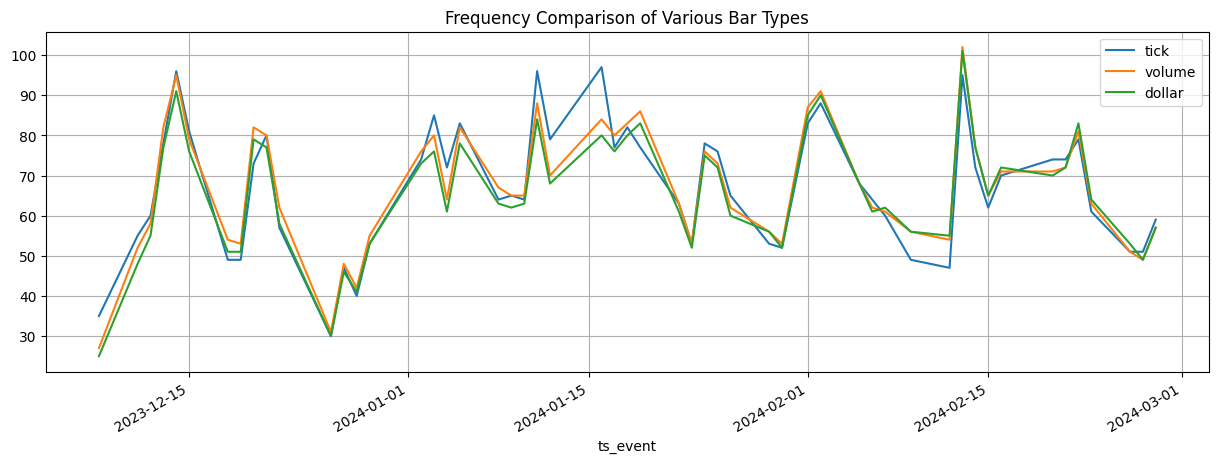

In [6]:
freq.plot(x="ts_event", y=["tick", "volume", "dollar"], figsize=(15, 5), title="Frequency Comparison of Various Bar Types", grid=True)

In [7]:
freq

,ts_event,tick,volume,dollar
60,2023-12-08 00:00:00-05:00,35,27.0,25.0
63,2023-12-11 00:00:00-05:00,55,52.0,48.0
64,2023-12-12 00:00:00-05:00,60,58.0,55.0
65,2023-12-13 00:00:00-05:00,78,82.0,77.0
66,2023-12-14 00:00:00-05:00,96,95.0,91.0
67,2023-12-15 00:00:00-05:00,81,79.0,76.0
70,2023-12-18 00:00:00-05:00,49,54.0,51.0
71,2023-12-19 00:00:00-05:00,49,53.0,51.0
72,2023-12-20 00:00:00-05:00,73,82.0,79.0
73,2023-12-21 00:00:00-05:00,80,80.0,77.0


In [8]:
freq.describe()

,tick,volume,dollar
count,53.000000,53.000000,53.000000
mean,66.886792,67.245283,65.528302
std,15.825564,15.541391,15.099164
min,30.000000,27.000000,25.000000
25%,53.000000,56.000000,55.000000
50%,65.000000,65.000000,64.000000
75%,78.000000,80.000000,77.000000
max,97.000000,102.000000,101.000000
